### Dataset of patients who received treatment in a hospital with multiple drugs and how many of them survived after 1 year. 
#### The objective is to observe whether there is a relationship between the treatment and the patient's condition at the end of 1 year of treatment.


In [40]:
# Loading Libraries to pro-processing and handle with data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Loading dataframe

pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')
pharma_data.head(3)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


## Exploratory Data Analysis 

- observe the profile of the variables of the dataset
- check categorical variables
- check null values
- check numeric variables
- check correlations between variables...

In [12]:
# Droping useless variables
p_data = pharma_data.drop(['ID_Patient_Care_Situation', 'Patient_ID'], axis=1)
p_data.head(1)

,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,8,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0


In [13]:
# Verifying categorical variables to understand their data
p_data['Patient_Smoker'].value_counts()

NO            13246
YES            9838
Cannot say       13
Name: Patient_Smoker, dtype: int64

In [14]:
p_data['Patient_Rural_Urban'].value_counts()

RURAL    16134
URBAN     6963
Name: Patient_Rural_Urban, dtype: int64

In [15]:
p_data['Patient_mental_condition'].value_counts()

Stable    23097
Name: Patient_mental_condition, dtype: int64

In [16]:
# It appears that the patient's condition is always the same, so this variable was also removed from the set
p_data = p_data.drop(['Patient_mental_condition'], axis=1)

In [17]:
p_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosed_Condition      23097 non-null  int64  
 1   Treated_with_drugs       23084 non-null  object 
 2   Patient_Age              23097 non-null  int64  
 3   Patient_Body_Mass_Index  23097 non-null  float64
 4   Patient_Smoker           23097 non-null  object 
 5   Patient_Rural_Urban      23097 non-null  object 
 6   A                        21862 non-null  float64
 7   B                        21862 non-null  float64
 8   C                        21862 non-null  float64
 9   D                        21862 non-null  float64
 10  E                        21862 non-null  float64
 11  F                        21862 non-null  float64
 12  Z                        21862 non-null  float64
 13  Number_of_prev_cond      21862 non-null  float64
 14  Survived_1_year       

In [18]:
p_data['Treated_with_drugs'].value_counts()

DX6                     8606
DX5                     1909
DX2                     1904
DX1                     1835
DX3                     1830
DX4                     1792
DX1 DX2                  448
DX3 DX4                  448
DX1 DX3                  424
DX4 DX5                  423
DX2 DX4                  419
DX1 DX4                  408
DX3 DX5                  407
DX1 DX5                  402
DX2 DX5                  400
DX2 DX3                  398
DX1 DX2 DX5              103
DX1 DX3 DX5              101
DX1 DX2 DX4               99
DX3 DX4 DX5               96
DX1 DX2 DX3               95
DX2 DX3 DX5               91
DX1 DX3 DX4               90
DX2 DX3 DX4               87
DX2 DX4 DX5               84
DX1 DX4 DX5               80
DX1 DX3 DX4 DX5           24
DX1 DX2 DX3 DX4           24
DX2 DX3 DX4 DX5           22
DX1 DX2 DX4 DX5           18
DX1 DX2 DX3 DX5           14
DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, dtype: int64

In [19]:
p_data['Treated_with_drugs'].fillna(value='DX6', axis = 0, inplace = True)

In [20]:
p_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosed_Condition      23097 non-null  int64  
 1   Treated_with_drugs       23097 non-null  object 
 2   Patient_Age              23097 non-null  int64  
 3   Patient_Body_Mass_Index  23097 non-null  float64
 4   Patient_Smoker           23097 non-null  object 
 5   Patient_Rural_Urban      23097 non-null  object 
 6   A                        21862 non-null  float64
 7   B                        21862 non-null  float64
 8   C                        21862 non-null  float64
 9   D                        21862 non-null  float64
 10  E                        21862 non-null  float64
 11  F                        21862 non-null  float64
 12  Z                        21862 non-null  float64
 13  Number_of_prev_cond      21862 non-null  float64
 14  Survived_1_year       

<AxesSubplot:>

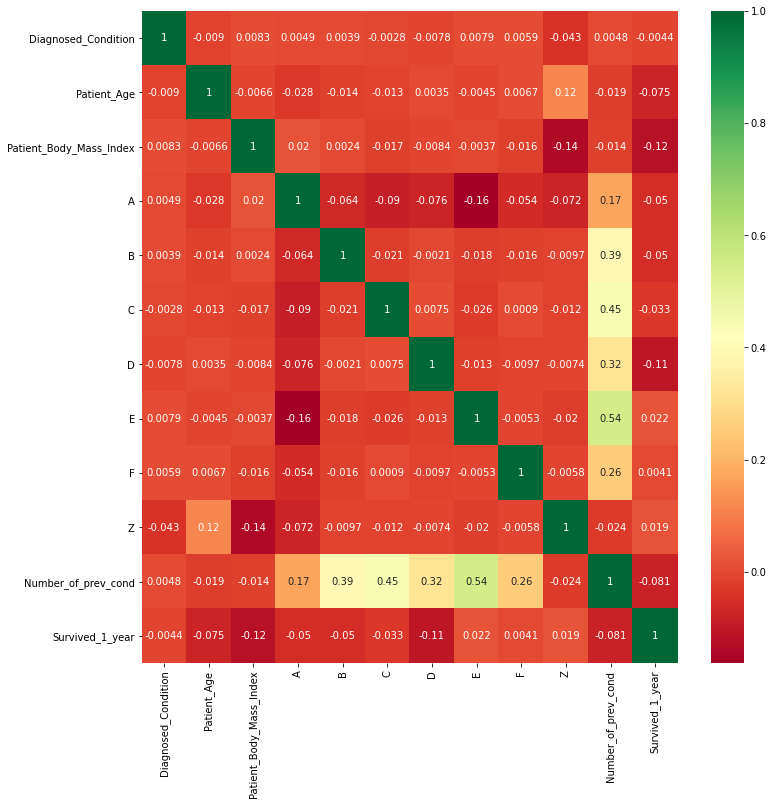

In [21]:
# Looking at the correlation of variables
corrmat = p_data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corrmat, annot=True, cmap="RdYlGn")

In [22]:
p_data['Number_of_prev_cond'].value_counts()

1.0    9386
2.0    9016
3.0    3026
4.0     397
5.0      37
Name: Number_of_prev_cond, dtype: int64

In [23]:
p_data['Number_of_prev_cond'].describe()

count    21862.000000
mean         1.750480
std          0.770311
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          5.000000
Name: Number_of_prev_cond, dtype: float64

In [24]:
# dealing with missing data

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
p_data['A'] = imp_mean.fit_transform(p_data[['A']])
p_data['B'] = imp_mean.fit_transform(p_data[['B']])
p_data['C'] = imp_mean.fit_transform(p_data[['C']])
p_data['D'] = imp_mean.fit_transform(p_data[['D']])
p_data['E'] = imp_mean.fit_transform(p_data[['E']])
p_data['F'] = imp_mean.fit_transform(p_data[['F']])
p_data['Z'] = imp_mean.fit_transform(p_data[['Z']])
p_data['Number_of_prev_cond'] = imp_mean.fit_transform(p_data[['Number_of_prev_cond']])

In [25]:
p_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosed_Condition      23097 non-null  int64  
 1   Treated_with_drugs       23097 non-null  object 
 2   Patient_Age              23097 non-null  int64  
 3   Patient_Body_Mass_Index  23097 non-null  float64
 4   Patient_Smoker           23097 non-null  object 
 5   Patient_Rural_Urban      23097 non-null  object 
 6   A                        23097 non-null  float64
 7   B                        23097 non-null  float64
 8   C                        23097 non-null  float64
 9   D                        23097 non-null  float64
 10  E                        23097 non-null  float64
 11  F                        23097 non-null  float64
 12  Z                        23097 non-null  float64
 13  Number_of_prev_cond      23097 non-null  float64
 14  Survived_1_year       

In [26]:
p_data['Number_of_prev_cond'].value_counts()

1.0    10621
2.0     9016
3.0     3026
4.0      397
5.0       37
Name: Number_of_prev_cond, dtype: int64

In [27]:
# Checking if everything is ok with the dependent variable
p_data['Survived_1_year'].value_counts()

1    14603
0     8494
Name: Survived_1_year, dtype: int64

C:\Users\felip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived_1_year', ylabel='count'>

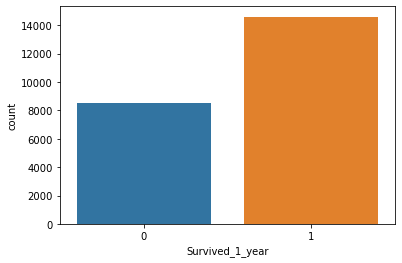

In [28]:
# Checking for data imbalance
sns.countplot(p_data['Survived_1_year'])

In [29]:
cat_col = ['Treated_with_drugs', 'Patient_Smoker', 'Patient_Rural_Urban']
p_data = pd.get_dummies(p_data, columns=cat_col)

In [30]:
# Separating dependent and independent variables
X = p_data.drop(['Survived_1_year', 'Patient_Smoker_Cannot say'], axis=1)
y = p_data['Survived_1_year']
X.head(1)

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,...,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,8,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,1


In [31]:
# creating the test and training sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 47)

In [32]:
# For this work we will use the random forest model

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000, random_state=1, n_jobs=-1)

In [33]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=1)

In [34]:
y_pred = rfc.predict(X_test)
from sklearn.metrics import f1_score
rf_fscore = f1_score(y_test, y_pred)

In [35]:
print("Model F1 Score:", rf_fscore)

Model F1 Score: 0.8543646408839779


### For this analysis, the F1 score was chosen, which showed a good value for a random forest model. 

In [36]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')
test_new.head(1)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0


In [37]:
test_new = test_new.drop(['ID_Patient_Care_Situation', 'Patient_ID', 'Patient_mental_condition'], axis=1)

In [38]:
test_new.head(1)

,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Number_of_prev_cond
0,40,DX3,16,29.443894,NO,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0


In [39]:
test_new = pd.get_dummies(test_new, columns=cat_col)
test_new.head(1)

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,...,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,40,16,29.443894,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0


In [40]:
Survived_1_year = rfc.predict(test_new)
res = pd.DataFrame(Survived_1_year)

In [41]:
for dados in Survived_1_year:
    print(f'{dados}', end=',')

1,1,1,0,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,0,0,1,0,1,1,1,0,0,1,1,0,1,0,0,1,1,1,1,0,1,1,1,0,0,0,0,1,1,1,0,0,1,1,1,1,1,1,0,1,1,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,1,1,0,0,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,0,0,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1,1,1,1,1,1,1,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1,1,1,0,1,0,1,0,0,1,1,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,0,1,1,0,1,0,0,0,0,1,1,1,1,1,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,1,1,0,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,0,1,1,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,1,0,0,1,1,1,1,1,1,1,0,1,1,0,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,1,1,1,0,0,0,1,0,0,1,1,0,1,0,0,1,1,1,0,1,1,1,1,0,1,1,1,1,0,0,1,0,0,1,1,1,0,0,0,0,1,1,1,0,1,1,0,

,0,1,1,1,0,1,0,0,1,1,1,0,1,1,1,0,1,1,1,1,0,0,1,0,0,1,0,1,1,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,0,0,0,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,1,1,1,0,1,1,0,1,0,1,0,1,1,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,1,1,1,0,1,1,1,1,1,0,1,0,0,1,1,1,1,1,0,1,1,0,0,1,1,0,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,0,1,1,1,1,0,0,0,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,0,0,1,0,1,1,0,0,1,1,1,0,0,1,0,1,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,1,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,1,1,1,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,1,0,1,0,1,1,1,0,1,1,1,1,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,1,0,1,0,1,1,1,0,1,1,0,0,0,1,0,1,0,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1,0,0,1,1,1,1,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,1,1,0,1,0,0,0,1,1,1,0,1,1,0,1,1,1,0,0,1,0,1,0,1,1,0,1,1,0,1,1,1,0,0,1,0,1,1,1,0,1,1,1,1,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,0,1,0,0,0,1,1,1,1,1,0,1,1,0,0,1